In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pyart
import os
import tempfile
from tint.data_utils import get_nexrad_keys, read_nexrad_key
from tint import Cell_tracks, animate
from tint.visualization import embed_mp4_as_gif
from boto.s3.connection import S3Connection
import gzip
from datetime import date, datetime, timedelta
from matplotlib import animation
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
from tint.tracks import Cell_tracks
from tint.visualization import animate


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Obtain sorted list of pyart grid files
data_dir = '/home/scarani/Desktop/data/tracking/radar_grids/20180623-25'  # put the path to your grid files here
grid_files = sorted(os.listdir(data_dir))
grid_files = [os.path.join(data_dir, file_name) for file_name in grid_files]
grid_files.sort()

# Create generator of pyart grid objects
grid_gen = (pyart.io.read_grid(file_name) for file_name in grid_files)

print(grid_gen)

<generator object <genexpr> at 0x7f651c4bc200>


In [4]:
# Instantiate tracks object and view parameter defaults
tracks_obj = Cell_tracks(field='reflectivity')

# Adjust size parameter
tracks_obj.params['FIELD_THRESH'] = 35
tracks_obj.params['FLOW_MARGIN'] = 10000
tracks_obj.params['GS_ALT'] = 1500
tracks_obj.params['ISO_SMOOTH'] = 3
tracks_obj.params['ISO_THRESH'] = 8
tracks_obj.params['MAX_DISPARITY'] = 999
tracks_obj.params['MAX_FLOW_MAG'] = 50
tracks_obj.params['MAX_SHIFT_DISP'] = 15
tracks_obj.params['MIN_SIZE'] = 4
tracks_obj.params['SEARCH_MARGIN'] = 4000


# Get tracks from grid generator
print(tracks_obj.params)

{'FIELD_THRESH': 35, 'MIN_SIZE': 4, 'SEARCH_MARGIN': 4000, 'FLOW_MARGIN': 10000, 'MAX_FLOW_MAG': 50, 'MAX_DISPARITY': 999, 'MAX_SHIFT_DISP': 15, 'ISO_THRESH': 8, 'ISO_SMOOTH': 3, 'GS_ALT': 1500}


In [ ]:
tracks_obj.get_tracks(grid_gen)


shape (500, 500)
shape (30, 218)
shape (32, 227)
shape (30, 223)
shape (36, 500)
shape (38, 500)
shape (174, 500)
shape (32, 500)
shape (28, 357)
shape (28, 362)
shape (32, 444)
shape (40, 402)
shape (48, 386)
shape (24, 300)
Writing tracks for scan 0
shape (500, 500)
shape (30, 218)
shape (30, 225)
shape (50, 500)
shape (30, 492)
shape (186, 500)
shape (30, 490)
shape (30, 500)
shape (30, 352)
shape (34, 361)
shape (32, 453)
shape (32, 446)
shape (30, 362)
shape (34, 396)
shape (51, 380)
shape (30, 297)
shape (18, 379)
shape (17, 321)
Writing tracks for scan 1
shape (500, 500)
shape (32, 500)
shape (48, 500)
shape (30, 218)
shape (30, 224)
shape (32, 500)
shape (64, 500)
shape (32, 478)
shape (30, 500)
shape (204, 500)
shape (30, 403)
shape (34, 352)
shape (30, 347)
shape (30, 357)
shape (30, 343)
shape (42, 455)
shape (36, 339)
shape (35, 353)
shape (31, 294)
shape (18, 374)
shape (19, 319)
Writing tracks for scan 2
shape (500, 500)
shape (34, 500)
shape (70, 500)
shape (32, 219)
sha

shape (42, 486)
shape (28, 467)
shape (38, 500)
shape (32, 493)
shape (28, 289)
shape (40, 295)
shape (32, 271)
shape (34, 460)
shape (30, 465)
shape (114, 442)
shape (32, 416)
shape (36, 362)
shape (30, 181)
shape (32, 257)
shape (32, 332)
shape (143, 403)
shape (30, 327)
shape (32, 377)
shape (30, 173)
shape (30, 388)
shape (30, 255)
shape (34, 230)
shape (32, 232)
shape (47, 388)
shape (30, 167)
shape (30, 468)
shape (30, 472)
shape (32, 177)
shape (29, 362)
shape (28, 184)
shape (23, 364)
shape (20, 180)
Writing tracks for scan 16
shape (500, 500)
shape (36, 500)
shape (64, 500)
shape (88, 474)
shape (30, 473)
shape (30, 475)
shape (32, 416)
shape (32, 481)
shape (32, 473)
shape (32, 475)
shape (54, 414)
shape (42, 387)
shape (40, 434)
shape (301, 491)
shape (30, 421)
shape (60, 454)
shape (34, 367)
shape (30, 484)
shape (56, 482)
shape (44, 500)
shape (30, 500)
shape (48, 497)
shape (34, 451)
shape (30, 458)
shape (30, 490)
shape (36, 450)
shape (30, 303)
shape (42, 457)
shape (42

shape (500, 500)
shape (52, 496)
shape (68, 468)
shape (66, 447)
shape (34, 464)
shape (28, 411)
shape (377, 500)
shape (28, 328)
shape (30, 332)
shape (32, 406)
shape (30, 306)
shape (30, 500)
shape (32, 499)
shape (32, 297)
shape (32, 416)
shape (30, 380)
shape (34, 276)
shape (34, 213)
shape (28, 217)
shape (32, 343)
shape (30, 351)
shape (42, 225)
shape (30, 227)
shape (32, 225)
shape (30, 230)
shape (30, 323)
shape (32, 211)
shape (28, 472)
shape (30, 467)
shape (46, 332)
shape (42, 366)
shape (30, 323)
shape (38, 356)
shape (32, 272)
shape (32, 367)
shape (32, 471)
shape (36, 216)
shape (38, 267)
shape (30, 205)
shape (32, 176)
shape (40, 168)
shape (30, 292)
shape (30, 299)
shape (34, 255)
shape (30, 258)
shape (32, 150)
shape (34, 259)
shape (32, 102)
shape (30, 283)
shape (30, 132)
shape (128, 179)
shape (40, 254)
shape (36, 170)
shape (30, 246)
shape (30, 221)
shape (38, 170)
shape (30, 157)
shape (34, 166)
shape (30, 199)
shape (32, 141)
shape (32, 153)
shape (30, 182)
shape

shape (40, 500)
shape (30, 169)
shape (30, 296)
shape (30, 163)
shape (30, 351)
shape (36, 419)
shape (28, 116)
shape (86, 155)
shape (36, 209)
shape (60, 110)
shape (30, 163)
shape (30, 81)
shape (30, 196)
shape (30, 56)
shape (32, 70)
shape (40, 80)
shape (30, 67)
shape (36, 459)
shape (34, 167)
shape (38, 91)
shape (30, 77)
shape (34, 415)
shape (36, 84)
shape (32, 139)
shape (38, 100)
shape (34, 161)
shape (48, 169)
shape (34, 137)
shape (30, 142)
shape (32, 149)
shape (38, 305)
shape (38, 308)
shape (33, 172)
shape (30, 163)
Writing tracks for scan 32
shape (500, 500)
shape (30, 397)
shape (36, 462)
shape (32, 402)
shape (32, 408)
shape (46, 458)
shape (468, 493)
shape (30, 422)
shape (32, 432)
shape (52, 452)
shape (30, 364)
shape (42, 500)
shape (28, 274)
shape (30, 438)
shape (30, 275)
shape (38, 444)
shape (58, 429)
shape (40, 385)
shape (30, 346)
shape (30, 395)
shape (36, 322)
shape (34, 184)
shape (32, 388)
shape (32, 223)
shape (32, 397)
shape (30, 325)
shape (32, 418)
sha

shape (32, 120)
shape (34, 499)
shape (36, 121)
shape (30, 123)
shape (32, 500)
shape (32, 56)
shape (32, 246)
shape (30, 253)
shape (38, 187)
Writing tracks for scan 38
shape (500, 500)
shape (482, 468)
shape (40, 490)
shape (30, 413)
shape (34, 415)
shape (32, 380)
shape (94, 500)
shape (30, 313)
shape (30, 212)
shape (32, 412)
shape (40, 398)
shape (34, 358)
shape (30, 366)
shape (30, 442)
shape (40, 411)
shape (32, 254)
shape (30, 268)
shape (40, 240)
shape (32, 412)
shape (30, 252)
shape (48, 275)
shape (30, 327)
shape (30, 342)
shape (28, 339)
shape (44, 357)
shape (68, 401)
shape (32, 330)
shape (70, 376)
shape (32, 500)
shape (34, 129)
shape (30, 336)
shape (32, 330)
shape (32, 431)
shape (40, 423)
shape (32, 118)
shape (30, 176)
shape (42, 440)
shape (50, 423)
shape (32, 358)
shape (40, 182)
shape (30, 84)
shape (34, 366)
shape (32, 92)
shape (44, 500)
shape (32, 84)
shape (40, 85)
shape (30, 158)
shape (40, 71)
shape (50, 66)
shape (36, 76)
shape (30, 27)
shape (34, 79)
shape

shape (30, 27)
shape (30, 166)
shape (32, 33)
shape (32, 76)
shape (46, 53)
Writing tracks for scan 44
shape (500, 500)
shape (428, 383)
shape (111, 480)
shape (34, 261)
shape (30, 449)
shape (64, 381)
shape (36, 271)
shape (32, 467)
shape (48, 366)
shape (38, 320)
shape (32, 305)
shape (48, 371)
shape (82, 333)
shape (34, 297)
shape (34, 344)
shape (32, 378)
shape (28, 175)
shape (36, 500)
shape (48, 373)
shape (42, 200)
shape (32, 178)
shape (30, 460)
shape (40, 371)
shape (32, 100)
shape (30, 369)
shape (30, 336)
shape (32, 337)
shape (32, 321)
shape (30, 428)
shape (32, 418)
shape (30, 463)
shape (42, 398)
shape (32, 459)
shape (30, 417)
shape (34, 71)
shape (30, 363)
shape (30, 76)
shape (36, 421)
shape (30, 367)
shape (50, 377)
shape (50, 491)
shape (30, 388)
shape (30, 47)
shape (60, 64)
shape (36, 434)
shape (38, 424)
shape (30, 311)
shape (30, 39)
shape (68, 414)
shape (30, 313)
shape (52, 387)
shape (30, 119)
shape (38, 473)
shape (46, 36)
shape (44, 432)
shape (32, 67)
shape

Animating 484 frames
Frame: 0


ValueError: cannot reshape array of size 0 into shape (499,)

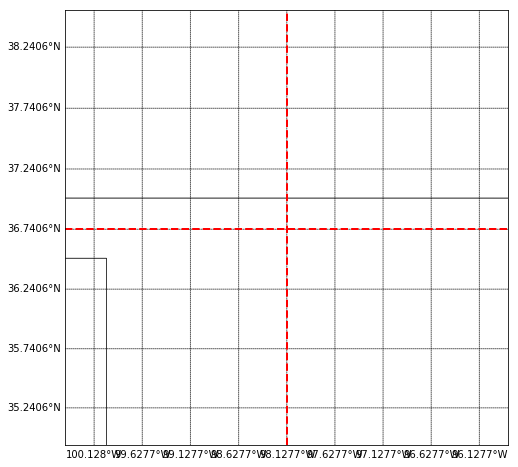

In [20]:
anim_gen = (pyart.io.read_grid(file_name) for file_name in grid_files)
# Create animation in current working directory
animate(tracks_obj, anim_gen, '/home/scarani/Desktop/output/tracking/20180623-25', alt=1500)